In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('beer_subset.csv.gz')

In [15]:
vc = df.beer_id.value_counts()

## If you had to pick 3 beers to recommend using only this data, which would you pick?

#### Need to see what the distribution of counts is for reviews on each beer. I'll plot a histogram with bins

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

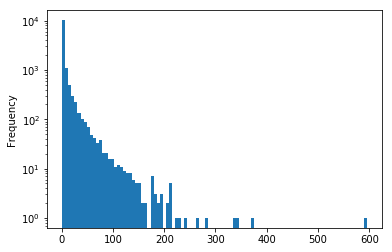

In [22]:
df['beer_id'].value_counts().plot(kind='hist',bins=100,logy=True)

In [ ]:
vc = vc.to_frame(name='count')
num = vc['count'].value_counts().to_frame(name='number_of_beers_with_x_reviews')

In [23]:
num.plot()

NameError: name 'num' is not defined

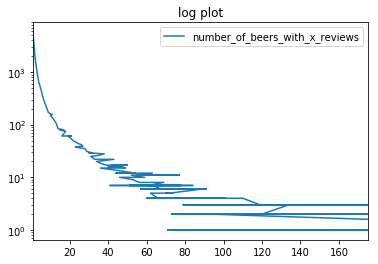

In [42]:
num.plot(logy=True,title='log plot')

In [46]:
num.columns=['num_beers']
num['cumsum']=num['num_beers'].cumsum()
num['beers_left']=num_beers-num['cumsum']
num['pct_left']=round(num['beers_left']*100/num_beers,1)

In [51]:
num

,num_beers,cumsum,beers_left,pct_left
1,5723,5723,7291,56.0
2,1939,7662,5352,41.1
3,1048,8710,4304,33.1
4,638,9348,3666,28.2
5,489,9837,3177,24.4
6,343,10180,2834,21.8
7,266,10446,2568,19.7
8,215,10661,2353,18.1
9,170,10831,2183,16.8
11,155,10986,2028,15.6


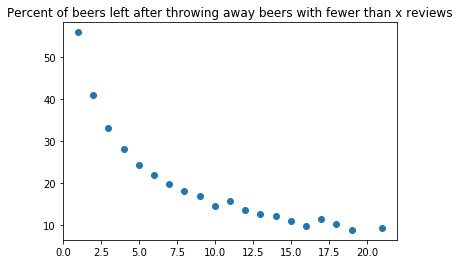

In [71]:
plt.scatter(num.index[:20],num.pct_left[:20])
plt.title('Percent of beers left after throwing away beers with fewer than x reviews')

#### Based on this, I determine that 10-20 reviews are necessary to make data robust

In [132]:
# use this variable to customize the cutoff
cutoff = 5

In [133]:
# return list of beers that satisfy the cutoff criteria then filter df
beers = list(vc[vc['count']>=cutoff].index)
new = df[df.beer_id.isin(beers)]

In [134]:
new['beer_id'].value_counts()

54904    595
55243    370
1904     344
17112    334
53863    282
52633    266
11757    241
54089    227
7971     226
52441    212
15881    211
53167    211
412      211
53388    209
10672    208
30420    206
34483    196
35036    195
52077    193
1093     190
101      188
1056     182
55081    181
29619    180
695      179
52704    179
54076    177
4083     176
52371    176
52855    176
        ... 
39188      5
50934      5
46210      5
53405      5
21296      5
46661      5
5654       5
49072      5
1895       5
1831       5
53583      5
2866       5
4886       5
12718      5
6724       5
37461      5
54368      5
40573      5
48036      5
47615      5
55695      5
26969      5
49484      5
5548       5
2804       5
19041      5
38101      5
5368       5
616        5
25645      5
Name: beer_id, dtype: int64

Still have 75k reviews, so I only threw away 25% of the overall ratings data

#### Rank remaining beers by their count and mean overall rating

In [135]:
top = new.groupby('beer_id').agg({'review_aroma':'count',
                        'review_overall':'mean'}).sort_values(['review_overall',
                                                               'review_aroma'],ascending=False)

In [136]:
top.head()

,review_aroma,review_overall
beer_id,,
12718,5,4.900000
47159,8,4.812500
54806,7,4.714286
54647,12,4.708333
53728,17,4.705882


Find top 5 best beers by overall rating

In [137]:
best = df[df.beer_id.isin(list(top.head().index))]

In [138]:
best_beers=list(best['beer_name'].unique())

In [139]:
best_beers

['Ramstein Oktoberfest',
 'Chocolate Rain',
 'Framboise',
 "Hunahpu's Imperial Stout - Bourbon Barrel Aged",
 'Mike Duggan #05 Asian Lager']

In [140]:
list(best['beer_style'].unique())

['Märzen / Oktoberfest',
 'American Double / Imperial Stout',
 'Fruit / Vegetable Beer',
 'Japanese Rice Lager']

In [141]:
best[['beer_name','beer_style']].drop_duplicates()

,beer_name,beer_style
1567,Ramstein Oktoberfest,Märzen / Oktoberfest
12850,Chocolate Rain,American Double / Imperial Stout
36467,Framboise,Fruit / Vegetable Beer
40050,Hunahpu's Imperial Stout - Bourbon Barrel Aged,American Double / Imperial Stout
44765,Mike Duggan #05 Asian Lager,Japanese Rice Lager


In [142]:
best.groupby('beer_name').agg({'abv':'count','review_aroma':'mean','review_overall':'mean','review_palate':'mean','review_taste':'mean'})

,abv,review_palate,review_aroma,review_overall,review_taste
beer_name,,,,,
Chocolate Rain,17,4.441176,4.941176,4.705882,4.941176
Framboise,8,4.375000,4.500000,4.812500,4.812500
Hunahpu's Imperial Stout - Bourbon Barrel Aged,12,4.583333,4.708333,4.708333,4.791667
Mike Duggan #05 Asian Lager,7,4.285714,3.785714,4.714286,4.285714
Ramstein Oktoberfest,5,4.400000,4.500000,4.900000,4.700000


In [146]:
rank5=new.groupby(['beer_id','beer_name']).agg({'abv':'count','review_aroma':'mean','review_overall':'mean','review_palate':'mean','review_taste':'mean'}).sort_values('review_overall',ascending=False)

In [147]:
rank0

,,abv,review_palate,review_aroma,review_overall,review_taste
beer_id,beer_name,,,,,
56201,Co-Conspirator V-Day,0,4.500000,4.500000,5.0,4.500000
55078,Abijah Rowe,2,4.000000,4.000000,5.0,4.000000
27901,King Boreas Imperial Wit,1,4.000000,4.000000,5.0,4.500000
14972,South Bay IPA,1,5.000000,4.500000,5.0,5.000000
38112,Pacemaker Porter,1,4.000000,4.500000,5.0,4.500000
56202,Co-Conspirator V-Day,0,4.500000,4.500000,5.0,4.500000
50014,Abbaye De Saint Bon-Chien Grand Cru (Aged In Cabernet Barrels),2,4.250000,4.250000,5.0,4.500000
33147,Harpoon Frankenfest (100 Barrel Series #16),1,4.000000,4.000000,5.0,5.000000
55765,Pappy Legba Saison,1,4.500000,4.500000,5.0,4.000000


In [152]:
rank5

,,abv,review_palate,review_aroma,review_overall,review_taste
beer_id,beer_name,,,,,
12718,Ramstein Oktoberfest,5,4.400000,4.500000,4.900000,4.700000
47159,Framboise,8,4.375000,4.500000,4.812500,4.812500
54806,Mike Duggan #05 Asian Lager,7,4.285714,3.785714,4.714286,4.285714
54647,Hunahpu's Imperial Stout - Bourbon Barrel Aged,12,4.583333,4.708333,4.708333,4.791667
53728,Chocolate Rain,17,4.441176,4.941176,4.705882,4.941176
6744,Schlafly Pilsner,5,4.200000,3.600000,4.700000,4.300000
54203,Cascade Autumn Gose,5,4.000000,4.300000,4.700000,4.600000
21690,Pliny The Younger,138,4.713768,4.782609,4.695652,4.764493
38149,Cable Car,23,4.521739,4.565217,4.695652,4.565217


In [148]:
rank10

,,abv,review_palate,review_aroma,review_overall,review_taste
beer_id,beer_name,,,,,
54647,Hunahpu's Imperial Stout - Bourbon Barrel Aged,12,4.583333,4.708333,4.708333,4.791667
53728,Chocolate Rain,17,4.441176,4.941176,4.705882,4.941176
21690,Pliny The Younger,138,4.713768,4.782609,4.695652,4.764493
38149,Cable Car,23,4.521739,4.565217,4.695652,4.565217
23413,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),10,4.600000,4.650000,4.650000,4.750000
20578,Czar Jack Imperial Stout,10,4.550000,4.350000,4.650000,4.800000
23030,Portsmouth Kate The Great,50,4.640000,4.480000,4.650000,4.720000
7971,Pliny The Elder,226,4.504425,4.634956,4.637168,4.652655
45957,Veritas 004,12,4.625000,4.458333,4.625000,4.750000


In [149]:
rank20

,,abv,review_palate,review_aroma,review_overall,review_taste
beer_id,beer_name,,,,,
21690,Pliny The Younger,138,4.713768,4.782609,4.695652,4.764493
38149,Cable Car,23,4.521739,4.565217,4.695652,4.565217
23030,Portsmouth Kate The Great,50,4.640000,4.480000,4.650000,4.720000
7971,Pliny The Elder,226,4.504425,4.634956,4.637168,4.652655
1545,Trappist Westvleteren 12,77,4.525974,4.623377,4.610390,4.642857
1062,Live Oak HefeWeizen,21,4.333333,4.214286,4.595238,4.357143
42816,Isabelle Proximus,23,4.543478,4.521739,4.586957,4.586957
37586,Dancing Man Wheat,37,4.270270,4.256757,4.581081,4.459459
48582,Daisy Cutter Pale Ale,43,4.232558,4.441860,4.569767,4.430233


In [150]:
# %store rank10

In [151]:
# %store -r